In [127]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class BoostedClassificationTrees:
    def __init__(self, max_tree_depth=2, num_iter=100) -> None:
        self.max_tree_depth = max_tree_depth
        self.num_iter = num_iter
        self.object_weights = None
        self.clf_weights = None
        self.trees = None

    # TODO: can make this more efficient by performing inference outside of the function one time. 
    def _num_negative(self, X_train: np.array, y_train: np.array, clf: DecisionTreeClassifier):
        y_pred = clf.predict(X_train)
        ind = np.where(y_pred != y_train, 1, 0)
        # print(f'miss: {sum(ind)}')
        # print(np.nonzero(ind))
        return np.dot(ind, self.object_weights)

    def _update_weights(self, X_train: np.array, y_train: np.array, alpha_t: float, clf: DecisionTreeClassifier):
        y_pred = clf.predict(X_train)
        raw_weights = self.object_weights * np.exp(-1 * y_pred * y_train * alpha_t)
        self.object_weights = raw_weights / np.sum(raw_weights)

    
    def fit(self, X_train: np.array, y_train: np.array) -> None:
        self.object_weights = np.ones(X_train.shape[0]) / X_train.shape[0]
        self.clf_weights = []
        self.trees = []

        for i in range(self.num_iter):
            dtc = DecisionTreeClassifier(max_depth=self.max_tree_depth)
            dtc.fit(X_train, y_train, sample_weight=self.object_weights)
            negatives = self._num_negative(X_train, y_train, dtc)
            alpha_t = 0.5 * np.log((1 - negatives) / negatives)

            self.trees.append(dtc)
            self.clf_weights.append(alpha_t)
            self._update_weights(X_train, y_train, alpha_t, dtc)
            # sns.lineplot(self.object_weights)
            # plt.show()

    def predict(self, X_test: np.array):
        if self.trees is None:
            raise(AssertionError("fit the model first before predicting."))
        preds = np.zeros(X_test.shape[0])
        for tree, weight in zip(self.trees, self.object_weights):
            preds += tree.predict(X_test) * weight

        return np.where(preds > 0, 1, -1)

In [118]:
clf = BoostedClassificationTrees()
clf.fit(X_train, y_train)
print(accuracy_score(y_test, clf.predict(X_test)))
accs.append(accuracy_score(y_test, clf.predict(X_test)))

0.8897177670023623


In [88]:
df = pd.read_csv('../data/mushrooms.csv')

In [89]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# loop through all columns of the dataframe and label encode them
for col in df.columns:
    df[col] = le.fit_transform(df[col])

df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [90]:
train_df = df[[col for col in df.columns if col != 'class']]
label = df['class']
label = np.where(label == 1, 1, -1)

In [126]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_df.values, label, test_size=0.2)
X_train.shape, X_test.shape

((6499, 22), (1625, 22))

<AxesSubplot: >

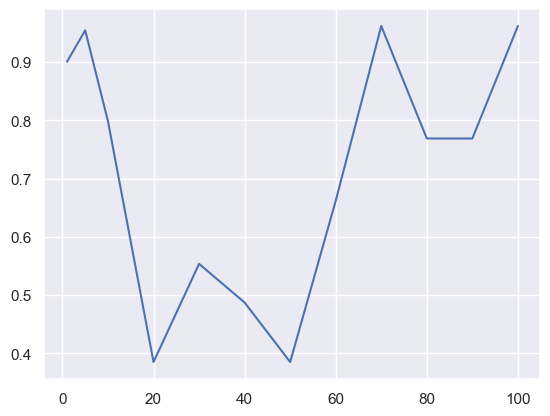

In [124]:
from sklearn.metrics import accuracy_score
import seaborn as sns

sns.set()

iter_grid = [1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
accs = []
for i in iter_grid:
    clf = BoostedClassificationTrees(num_iter=i)
    clf.fit(X_train, y_train)
    accs.append(accuracy_score(y_test, clf.predict(X_test)))

sns.lineplot(x=iter_grid, y=accs)

In [67]:
clf.trees[0].decision_path

<bound method BaseDecisionTree.decision_path of DecisionTreeClassifier(max_depth=2)>

In [57]:
np.unique(clf.predict(X_test), return_counts=True)



(array([-1,  1]), array([941, 684]))

In [73]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(clf.trees[1], out_file=None,
                           feature_names=train_df.columns,
                           class_names=["-1", "1"],
                           filled=True, rounded=True,
                           special_characters=True)

graph = graphviz.Source(dot_data)
graph.view()

'Source.gv.pdf'

In [74]:
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(X_train, y_train)
print(accuracy_score(y_test, clf.predict(X_test)))

0.9076923076923077


In [84]:
iris_df = pd.read_csv('../data/iris.data', header=None)
iris_df[4] = np.where(iris_df[4] != 'Iris-virginica', -1, 1)

label = iris_df[4]
train_df = iris_df.loc[:, :3]

X_train, X_test, y_train, y_test = train_test_split(train_df.values, label, test_size=0.2, random_state=42)


clf = BoostedClassificationTrees()
clf.fit(X_train, y_train)
print(accuracy_score(y_test, clf.predict(X_test)))
accs.append(accuracy_score(y_test, clf.predict(X_test)))

0
22     0.008679
15     0.008679
65     0.008679
11     0.008679
42     0.008679
         ...   
71     0.008679
106    0.008679
14     0.008679
92     0.008679
102    0.008679
Name: 4, Length: 120, dtype: float64
1
22     0.008764
15     0.008764
65     0.008764
11     0.008764
42     0.008764
         ...   
71     0.008764
106    0.000087
14     0.008764
92     0.008764
102    0.008764
Name: 4, Length: 120, dtype: float64
2
22     8.765244e-03
15     8.765244e-03
65     8.765244e-03
11     8.765244e-03
42     8.765244e-03
           ...     
71     8.765244e-03
106    8.526927e-09
14     8.765244e-03
92     8.765244e-03
102    8.765244e-03
Name: 4, Length: 120, dtype: float64
3
22     8.765244e-03
15     8.765244e-03
65     8.765244e-03
11     8.765244e-03
42     8.765244e-03
           ...     
71     8.765244e-03
106    8.219220e-17
14     8.765244e-03
92     8.765244e-03
102    8.765244e-03
Name: 4, Length: 120, dtype: float64
4
22     8.765244e-03
15     8.765244e-03
65     8.7

In [87]:
dot_data = export_graphviz(clf.trees[8], out_file=None,
                           feature_names=train_df.columns,
                           class_names=["-1", "1"],
                           filled=True, rounded=True,
                           special_characters=True)

graph = graphviz.Source(dot_data)
graph.view()

'Source.gv.pdf'